In [3]:
!pip install tensorflow[and-cuda]

  Obtaining dependency information for tensorflow[and-cuda] from https://files.pythonhosted.org/packages/93/21/9b035a4f823d6aee2917c75415be9a95861ff3d73a0a65e48edbf210cec1/tensorflow-2.15.0-cp311-cp311-win_amd64.whl.metadata
  Obtaining dependency information for tensorflow-intel==2.15.0 from https://files.pythonhosted.org/packages/4c/48/1a5a15517f18eaa4ff8d598b1c000300b20c1bb0e624539d702117a0c369/tensorflow_intel-2.15.0-cp311-cp311-win_amd64.whl.metadata
  Obtaining dependency information for nvidia-cublas-cu12==12.2.5.6 from https://files.pythonhosted.org/packages/fd/79/02e883f2ec80c831292ec02862212b6131d4688f17376352fceb23bf9a60/nvidia_cublas_cu12-12.2.5.6-py3-none-win_amd64.whl.metadata
  Obtaining dependency information for nvidia-cuda-cupti-cu12==12.2.142 from https://files.pythonhosted.org/packages/b5/15/1cdeec07d76aaf0c1a740e9c42d334f2f7d48279fa38c998c36e395c3b09/nvidia_cuda_cupti_cu12-12.2.142-py3-none-win_amd64.whl.metadata
  Obtaining dependency information for nvidia-cuda-n

NameError: name 'python' is not defined

In [4]:
from tensorflow.keras import layers
from tensorflow.keras import models
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential, Model

In [5]:
!pip install np_utils

  Using cached np_utils-0.6.0-py3-none-any.whl


In [6]:
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, BatchNormalization, GlobalAveragePooling2D
import np_utils

In [7]:
!pip install pandas
!pip install opencv-python
!pip install tqdm
!pip install glob2

  Obtaining dependency information for opencv-python from https://files.pythonhosted.org/packages/38/d2/3e8c13ffc37ca5ebc6f382b242b44acb43eb489042e1728407ac3904e72f/opencv_python-4.8.1.78-cp37-abi3-win_amd64.whl.metadata
   ---------------------------------------- 0.0/38.1 MB ? eta -:--:--
   ---------------------------------------- 0.0/38.1 MB ? eta -:--:--
   ---------------------------------------- 0.0/38.1 MB 487.6 kB/s eta 0:01:18
   ---------------------------------------- 0.1/38.1 MB 819.2 kB/s eta 0:00:47
   ---------------------------------------- 0.2/38.1 MB 1.1 MB/s eta 0:00:34
   ---------------------------------------- 0.3/38.1 MB 1.2 MB/s eta 0:00:32
   ---------------------------------------- 0.3/38.1 MB 1.3 MB/s eta 0:00:30
   ---------------------------------------- 0.4/38.1 MB 1.4 MB/s eta 0:00:27
    --------------------------------------- 0.6/38.1 MB 1.8 MB/s eta 0:00:22
    --------------------------------------- 0.9/38.1 MB 2.4 MB/s eta 0:00:16
   - --------------

In [8]:
import numpy as np
import pandas as pd
import cv2
import os
from tqdm import tqdm
from glob2 import glob

In [9]:
!pip install scikit-learn
!pip install matplotlib

In [10]:
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

In [11]:
from tensorflow.keras.applications import VGG19
import tensorflow as tf

In [12]:
!pip install fsspec

In [13]:
data= pd.read_csv("C:/Users/shralatt/Desktop/Project/VGG19_project/Dataset/driver_imgs_list.csv")
data

,subject,classname,img
0,p002,c0,img_44733.jpg
1,p002,c0,img_72999.jpg
2,p002,c0,img_25094.jpg
3,p002,c0,img_69092.jpg
4,p002,c0,img_92629.jpg
...,...,...,...
22419,p081,c9,img_56936.jpg
22420,p081,c9,img_46218.jpg
22421,p081,c9,img_25946.jpg
22422,p081,c9,img_67850.jpg


In [14]:
activity_map = {'c0':'Safe driving',
               'c1':'Texting - right',
               'c2':'Talking on the phone - right',
               'c3':'Texting - left',
               'c4':'Talking on the phone - left',
               'c5':'Operating the radio',
               'c6':'Drinking',
               'c7':'Reaching behind',
               'c8':'Hair and Makeup',
               'c9':'Talking to the passenger'}

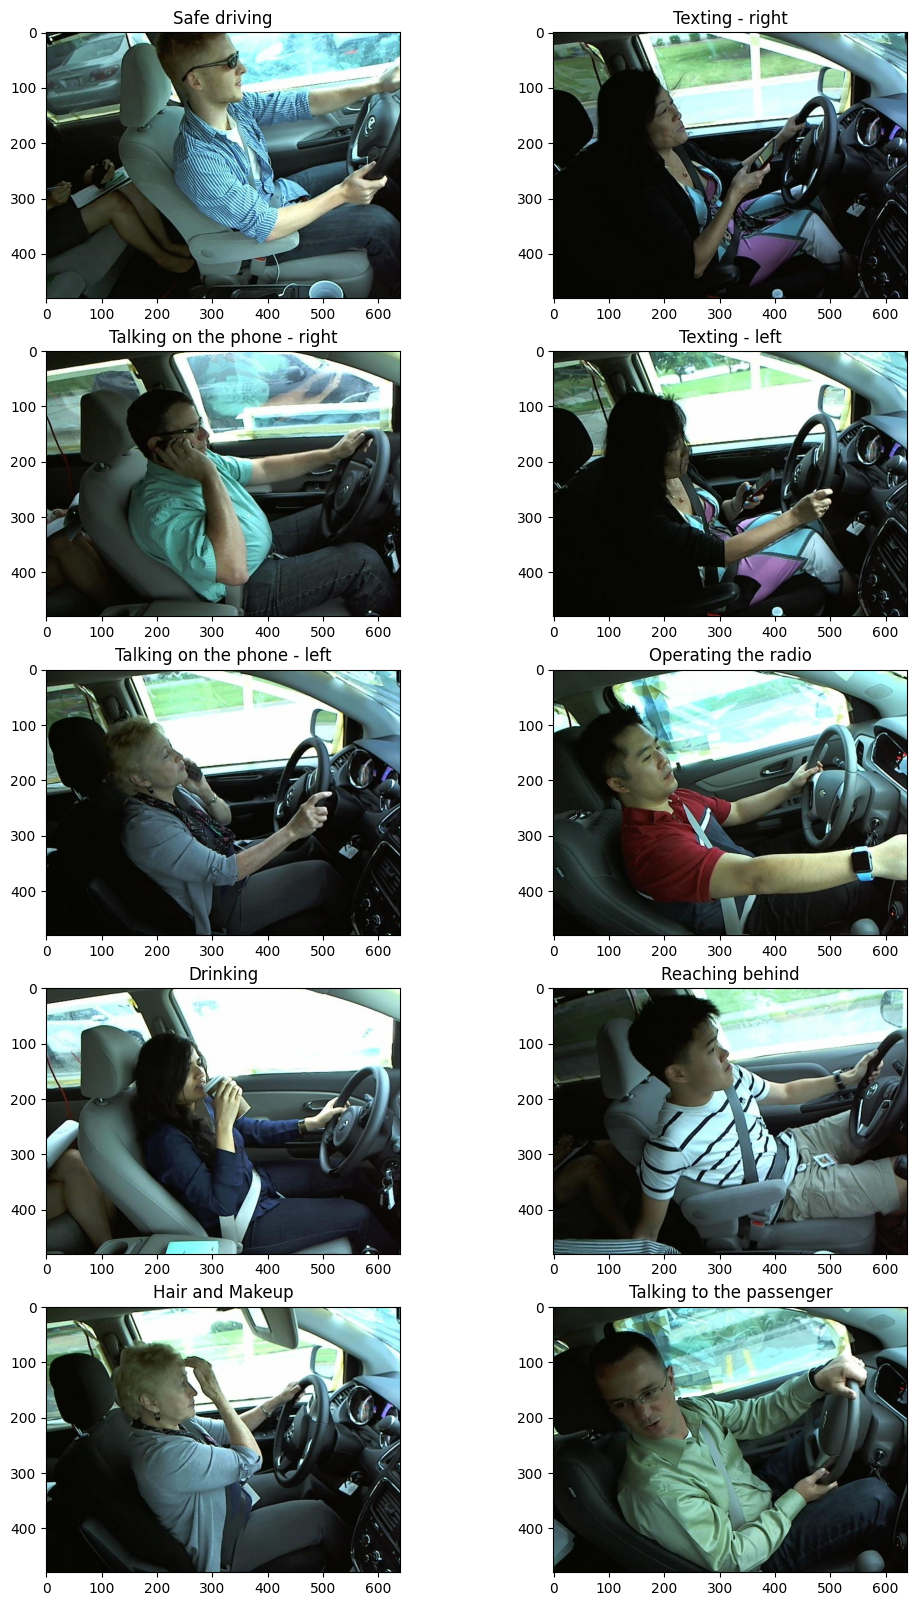

In [15]:
plt.figure(figsize = (12,20))
image_count = 1
train_imgs = "C:/Users/shralatt/Desktop/Project/VGG19_project/Dataset/imgs/train/"
for directory in os.listdir(train_imgs):
    if directory[0] != '.':
        c=0
        for i, file in enumerate(os.listdir(train_imgs + directory)):
            if i==1:
                break
            else:
                fig = plt.subplot(5,2,image_count)
                image_count +=1
                image = mpimg.imread(train_imgs + directory + '/' + file)
                plt.imshow(image)
                plt.title(activity_map[directory])

In [17]:
!pip install split-folders

In [18]:
import splitfolders
data_dir = "C:/Users/shralatt/Desktop/Project/VGG19_project/Dataset/imgs/train/"
splitfolders.ratio(data_dir,output='output', seed=1337, ratio=(.8,.2), group_prefix=None, move=False)

Copying files: 22424 files [00:39, 572.79 files/s]


In [19]:
batch_size = 32
img_height = 224
img_width = 224

datagen_train = ImageDataGenerator(rescale = 1./255)
datagen_val = ImageDataGenerator(rescale = 1./255)

train_generator = datagen_train.flow_from_directory("C:/Users/shralatt/Desktop/Project/VGG19_project/output/train/", 
                                                   target_size=(img_height, img_width),
                                                   batch_size = batch_size,
                                                   class_mode = 'categorical',
                                                   subset = 'training')
val_generator = datagen_val.flow_from_directory("C:/Users/shralatt/Desktop/Project/VGG19_project/output/val/",
                                                target_size=(img_height, img_width),
                                                batch_size = batch_size,
                                                class_mode = 'categorical')


Found 17934 images belonging to 10 classes.
Found 4490 images belonging to 10 classes.


In [20]:
def plot_train_history(history):
    plt.plot(history.history['accuracy'])
    plt.plot(history.history['val_accuracy'])
    plt.title("Model accuracy")
    plt.ylabel("accuracy")
    plt.xlabel('epoch')
    plt.legend(['train','test'], loc='upper left')
    plt.show()
    
    plt.plot(history.history['loss'])
    plt.plot(history.history['val_loss'])
    plt.title("Model Loss")
    plt.ylabel("Loss")
    plt.xlabel('epoch')
    plt.legend(['train','test'], loc='upper left')
    plt.show()

In [21]:
base_model = VGG19(weights= 'imagenet', include_top = False, input_shape=(224,224,3))
base_model.summary()
top_layer = base_model.get_layer('block5_pool')
last_output = top_layer.output

new_layer = tf.keras.layers.Flatten()(last_output)
new_layer = tf.keras.layers.Dense(2048,activation='relu')(new_layer)
new_layer = tf.keras.layers.Dense(1024,activation='relu')(new_layer)
new_layer = tf.keras.layers.Dropout(0.2)(new_layer)
new_layer = tf.keras.layers.Dense(256,activation='relu')(new_layer)
new_layer = tf.keras.layers.Dropout(0.3)(new_layer)
new_layer = tf.keras.layers.Dense(10,activation='softmax')(new_layer)

final_model = tf.keras.Model(base_model.input,new_layer)
final_model.compile(optimizer = tf.keras.optimizers.SGD(learning_rate= 0.001),
                   loss = 'categorical_crossentropy',
                   metrics = ['accuracy'])

Model: "vgg19"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 56, 56, 128)       0     

In [22]:
n_epochs = 5
history_train = final_model.fit(train_generator,
                               steps_per_epoch = 20,
                               epochs = n_epochs,
                               verbose = 1,
                               validation_data = val_generator,
                               validation_steps = 5)

Epoch 1/5
20/20 [==============================] - 216s 11s/step - loss: 2.4297 - accuracy: 0.1125 - val_loss: 2.2467 - val_accuracy: 0.1625
Epoch 2/5
20/20 [==============================] - 211s 11s/step - loss: 2.2866 - accuracy: 0.1562 - val_loss: 2.1748 - val_accuracy: 0.1813
Epoch 3/5
20/20 [==============================] - 208s 10s/step - loss: 2.2601 - accuracy: 0.1704 - val_loss: 2.1419 - val_accuracy: 0.3250
Epoch 4/5
20/20 [==============================] - 213s 11s/step - loss: 2.1382 - accuracy: 0.2625 - val_loss: 2.0531 - val_accuracy: 0.3938
Epoch 5/5
20/20 [==============================] - 216s 11s/step - loss: 2.0739 - accuracy: 0.2719 - val_loss: 1.9058 - val_accuracy: 0.5375


In [23]:
tf.saved_model.save(final_model, "C:/Users/shralatt/Desktop/Project/VGG19_project/Model")

INFO:tensorflow:Assets written to: C:/Users/shralatt/Desktop/Project/VGG19_project/Model\assets


INFO:tensorflow:Assets written to: C:/Users/shralatt/Desktop/Project/VGG19_project/Model\assets


#### Saving the file

In [24]:
model=tf.keras.Model()
model.save_weights("C:/Users/shralatt/Desktop/Project/VGG19_project/Model")

#### Checking for GPU

In [25]:
import tensorflow as tf
print("Num GPUs Available: ", len(tf.config.list_physical_devices('GPU')))


Num GPUs Available:  0


In [26]:
tf.debugging.set_log_device_placement(True)

# Place tensors on the CPU
with tf.device('/GPU:1'):
  a = tf.constant([[1.0, 2.0, 3.0], [4.0, 5.0, 6.0]])
  b = tf.constant([[1.0, 2.0], [3.0, 4.0], [5.0, 6.0]])

# Run on the GPU
c = tf.matmul(a, b)
print(c)

tf.Tensor(
[[22. 28.]
 [49. 64.]], shape=(2, 2), dtype=float32)


In [27]:
tf.debugging.set_log_device_placement(True)

try:
  # Specify an invalid GPU device
  with tf.device('/device:GPU:2'):
    a = tf.constant([[1.0, 2.0, 3.0], [4.0, 5.0, 6.0]])
    b = tf.constant([[1.0, 2.0], [3.0, 4.0], [5.0, 6.0]])
    c = tf.matmul(a, b)
except RuntimeError as e:
  print(e)

In [28]:
import tensorflow as tf
print("Num GPUs Available: ", len(tf.config.list_physical_devices('GPU')))


Num GPUs Available:  0


#### Code continued 

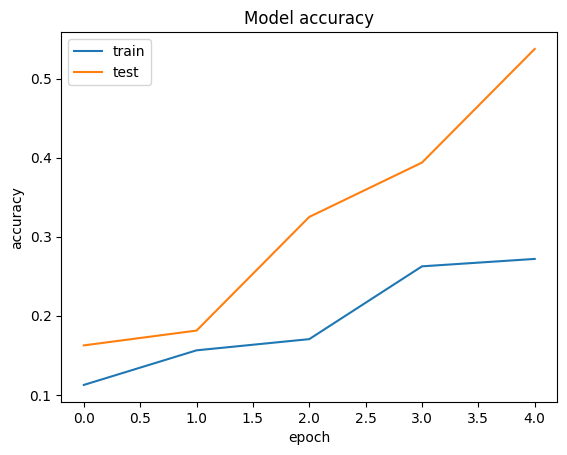

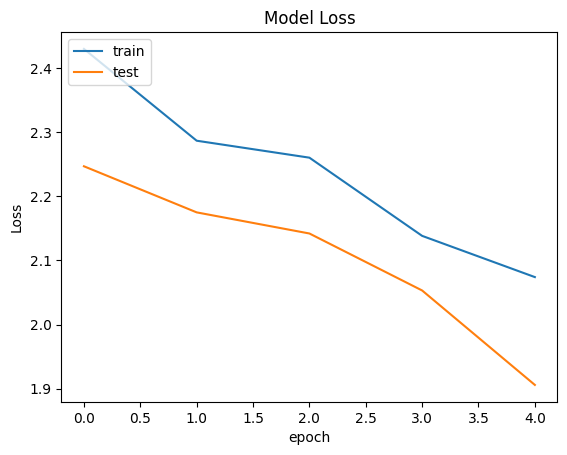

In [29]:
plot_train_history(history_train)